# Проект: "Ритейл — Анализ программы лояльности"

**Цель проведения проекта:**\
Изучить все собранные данные по продажам за период с 01.12.2016 8:26 по 28.02.2017 17:44, и определить эффективность внедренной программы лояльности. Показатели для оценки программы необходимо выбрать самостоятельно.

**Задачи проекта:**
1.	Произвести декомпозицию задач.
2.	Изучить полученные данные.
3.	Провести предобработку данных.
4.	Провести исследовательский анализ данных.
5.	Определить метрики для оценки бизнес показателей и провести их анализ.
6.	Сформулировать вывод об эффективности программы лояльности.
    - Если программа окажется эффективной, то предложить способы повышения ее эффективности и обосновать внедрение других программ;
    - Если программа окажется не эффективной, то предложить каких еще клиентов стоит подключить к программе лояльности.
7.	Сформулировать и проверить статистические гипотезы
8.	Подготовить презентацию.


## План проведения проекта:

1.	Загрузка и знакомство с данными\
    1.1 Подключить необходимые библиотеки\
    1.2 Загрузить данные из полученных файлов формата .csv\
    1.3 Обзор датасетов\
    1.3.1 Обзор первых десяти строк датасета retail_dataset\
    1.3.2 Обзор общей информации датасета retail_dataset\
    1.3.3 Обзор статистических данных retail_dataset\
    1.3.4 Обзор первых десяти строк датасета product_codes\
    1.3.5 Обзор общей статистической информации датасета product_codes
    
2.	Предобработка данных\
    2.1 Поиск и обработка явных и неявных дубликатов в product_codes\
    2.2 Изменение форматов значений в retail_dataset\
    2.3 Объединение двух датасетов\
    2.4 Приведение значений к формату правил хорошего тона\
    2.5 Поиск, обзор и удаление явных дубликатов\
    2.6 Заполнение пропусков\
    2.7 Обзор значений в столбце с данными о количестве товара (quantity)\
    2.8 Проверка и обработка аномальных значений количества покупок (quantity)\
    2.9 Добавление значений месяца формирования чека\
    2.10 Расчет суммы покупки\
    2.11 Выводы по разделу\
    
    
3.	Исследовательский анализ данных\
    3.1 Обзор периода исследования\
    3.2 Обзор уникальных значений магазинов\
    3.3 Обзор уникальных значений программ лояльности\
    3.2 Количество покупателей в разрезе категорий по признаку участия в программе лояльности\
    3.3 Обзор суммы покупок в разрезе категорий покупателей по признаку участия в программе лояльности\
    3.4 Количество товаров в покупках каждой из категории покупателей\
    3.5 Рейтинг популярности товаров по каждой категории покупателей\
    3.6 Выводы по разделу
    
4.	Работа с метриками и бизнес-показателями\
    4.1 Рассчет среднего чека покупателей в разрезе категорий по признаку участия в программе лояльности\
    4.2 Рассчет среднего количества покупателей в день по признаку участия в программе лояльности\
    4.3 Рассчет пожизненной ценности клиента LTV в зависимости от участия в программе лояльности\
    4.3.1 Формирование профилей покупателей\
    4.3.2 Формирования продаж в разрезе покупателей\
    4.3.3 Формирование функции для расчтеа LTV\
    4.3.4 Ввод начальных расчетных параметров\
    4.3.5 Вызов функции расчета LTV\
    4.3.6 Построение графиков LTV и динамики LTV покупателей\
    4.4 Выводы по разделу
    
5.	Проверка гипотез\
    5.1 Средний чек участников программы лояльности выше, чем у остальных покупателей\
    5.2 Среднее количество купленного товара у посетителей одинаково, не зависимо от участия в программе лояльности\
    5.3 Выводы по разделу
    
6.	Выводы и рекомендации для заказчика

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Привет, на самом деле план не плохой и достаточно подробный, но:
    
1. В исследовательском анализе не забудь, что заказчик заинтересован в сравнении декабрьских продаж с остальными месяцами

1. Продумай, что же все таки будет успехом программы лояльности. Ты описал много параметров, но на что мы будем смотреть в первую очередь? В когортном анализе мы смотрим на LTV, а в анализе программы лояльности его уже нет... Представь, что в итоге мы получим Ltv у лояльных клиентов выше, средний чек ниже, а количество покупок примерно одинаковое. Или можно представить любое другое разнонаправленное сочетание. Также вопрос, что если LTV  за 2-3 месяца ниже, но растет быстрее? Что мы будем считать успехом программы лояльности? Какой факт скажет нам - да, программа успешна, продолжаем?
    
2. В самом проекте нужно будет более строго сформулировать нулевые и альтернативные гипотезы. Посни, что нулевая гипотеза - это всегда гипотеза о равенстве, почти всегда правильнее ее проверять против двухсторонней альтернативы
</div>

## Загрузка и ознакомление с данными

### Подключение необходимых библиотек

In [346]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
from scipy import stats as st
from scipy.stats import mannwhitneyu

### Загрузка данных из полученных файлов формата .csv

In [3]:
try:
    retail_dataset = pd.read_csv('./Projects/Project_Final_Retail/datasets/retail_dataset.csv')
    product_codes=pd.read_csv('./Projects/Project_Final_Retail/datasets/product_codes.csv')
except:
    retail_dataset = pd.read_csv('/datasets/retail_dataset.csv')
    product_codes=pd.read_csv('/datasets/product_codes.csv')

Полученные данные из файлов retail_dataset.csv и product_codes.csv были подгружены в следующие датасеты:
- retail_dataset.csv выгружен в датасет retail_dataset
- product_codes.csv выгружен в датасет product_codes

### Обзор датасетов

#### Обзор первых десяти строк датасета retail_dataset

In [4]:
retail_dataset.head(10)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0
5,538379,22965,0,2016-12-12 11:26:00,22805.0,Shop 0,1.0
6,540468,22189,0,2017-01-07 13:55:00,NaN,Shop 0,0.0
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0.0
8,538883,22891,0,2016-12-14 15:56:00,NaN,Shop 0,0.0
9,539501,22372,0,2016-12-20 11:08:00,22764.0,Shop 0,1.0


Датасет содержит следующие значения стобцов данных:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

#### Обзор общей информации датасета retail_dataset

In [5]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


Из общих сведений о датасете можно сделать следующие выводы:
1. Всего 8 столбцов вместе с индексным
2. Наименования столбцов не соответствуют правилам хорошего тона при оформлении
3. Датасет содержит 10535 строк данных
4. В столбце CustomerID содержатся пропуски значений
5. Формат данных в столбце purchasedate не соответствует формату даты и времени
6. Формат данных в столбце CustomerID не соответствует назначению и требует переформатирования
7. Формат столбца loyalty_program целесообразней привести к формату int64

####  Обзор статистических данных retail_dataset

In [6]:
retail_dataset.describe()

,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


Статистический анализ данных столбца Quantity говорит о большом разбросе значений, что требует детального анализа на выбросы. Столбец CustomerID в дальнейшем будет переформатирован в формат object. Столбец loyalty_program имеет только два значения 0 и 1, что определяет участие покупателя в программе лояльности или нет.

#### Обзор первых десяти строк датасета product_codes

In [7]:
product_codes.head(10)

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39
5,22752,7.65
6,21730,4.25
7,22633,1.85
8,22632,1.85
9,84879,1.69


Датасет содержит следующие данные:
- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;

#### Обзор общей информации датасета product_codes

In [8]:
product_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


При обзоре можно сделать следующие заключения:
1. Датасет содержит два столбца с данными
2. Датасет содержит 9969 строк данных
3. Пропуски в данных не обнаружены
4. Наименование столбцов привести к соотвестивию правилу хорошего тона
5. Тип данных соответствует назначению

#### Обзор общей статистической информации датасета product_codes

In [9]:
product_codes.describe()

,price_per_one
count,9969.000000
mean,19.503697
std,330.880754
min,0.000000
25%,1.250000
50%,2.550000
75%,5.510000
max,16888.020000


Статистические сведения цифровых данных показывает большой разброс значений, что требует дополнительного изучения и обработки

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Хорошо, данные верно подгружены и описаны
</div>

## Предобработка данных

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Первым шагом стоило привести названия к стандарту
    
</div>

<div class="alert alert-info"> <b>Коментарий студента:
    </b>
    Спасибо за подсказку.
    Я лишь хотел сделать это действие только псле объединения двух датасетов, что позволит сразу внести испраления во все данные и в последующем легко проявятся явные дубликаты.</div>

### Поиск и обработка явных и неявных дубликатов в product_codes

Т.к. в предыдущем разделе при обзоре данных не было обнаружено пропусков, а так же типы данных соответствуют назначению, в данном разделе произведем только поиск и обработку явных и неявных дубликатов. Приведение наименований столбцов к правилам хорошего тона произведем после объединения датасета, с целью экономии строк кода.
Для начала посчитаем количество уникальных значений товаров

Для начала посчитаем количество уникальных значений товаров

In [10]:
product_codes['productID'].nunique()

3159

Таким образом из 9969 строк датасета только 3159 являются уникальными. Это говорит о том, что значения в датасете повторяются и необходимо избавиться от дубликатов, но перед этим изучить какие уникальные значения дубликатов имеют частые повторы.

In [11]:
product_codes.groupby('productID', as_index=False).nunique()\
    .query('price_per_one > 1').sort_values(by='price_per_one', ascending=False)

,productID,price_per_one
3150,DOT,174
3151,M,59
3153,S,29
3152,POST,15
3139,D,13
...,...,...
729,21705,2
2345,84584,2
723,21695,2
720,21692,2


По результатам полученного среза, при котором были выведены результаты фиксации уникального значения id продукта, более чем один раз. Т.о. в 2494 строках из 9969, дублирование цены происходит более одного раза, что само по себе некорректно в отрыве от даты.\
Посмотрим, сколько повторов значений цены у 5% датасета.

In [12]:
np.percentile((product_codes.groupby('productID', as_index=False).nunique()['price_per_one']), 95)

6.0

В 5% случаев, повтор цены происходит от 6-ти и более раз. Это еще раз говорит о том, что в данных много дубликатов, при этом значения могут и не повторятся с одинаковым значением. Проверим это:

In [13]:
product_codes.groupby('productID')['price_per_one']\
    .agg({'min', 'mean','max'})\
    .sort_values(by='max', ascending=False)\
    .reset_index()

,productID,min,mean,max
0,AMAZONFEE,1.00,9268.762222,16888.02
1,M,0.19,253.765932,1715.85
2,BANK CHARGES,15.00,385.947500,1050.15
3,DOT,2.51,278.734425,950.99
4,22655,125.00,228.500000,295.00
...,...,...,...,...
3154,35951,0.00,0.000000,0.00
3155,72814,0.00,0.000000,0.00
3156,84612B,0.00,0.000000,0.00
3157,35969,0.00,0.000000,0.00


Наше предположение было верное. Разброс значений цены в ряде случаев носит колоссальный характер. Различие в ценах в апогее может достигать 16888 раз.\
В данном случае целесообразно привести все цены к медианному значению, что позволит в дальнейшем, боле менее корректно, рассчитать сумму покупки по чекам покупателей обеих когорт.\
Рассчитаем медианное значение цен по уникальным товарам и запишем их в переменную price.


In [14]:
price = product_codes.groupby('productID')['price_per_one']\
    .agg({'median'})\
    .sort_values(by='median', ascending=False)\
    .reset_index()
price

,productID,median
0,AMAZONFEE,6706.71
1,22655,265.50
2,DOT,198.19
3,22826,175.00
4,22827,155.00
...,...,...
3154,84227,0.00
3155,85110,0.00
3156,84509F,0.00
3157,35991,0.00


In [15]:
price.columns=['item_ID', 'price_per_one']
price.head(5)

,item_ID,price_per_one
0,AMAZONFEE,6706.71
1,22655,265.50
2,DOT,198.19
3,22826,175.00
4,22827,155.00


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Да, медиана - это возможный выбор в данном случае.
</div>

### Изменение форматов значений в retail_dataset

В соответствии с назначением данных, приведем их к нужному формату:
1. purchasedate приведем к формату datetime
2. CustomerID приведем к формату object
3. loyalty_program приведем к формату int64

In [16]:
retail_dataset['purchasedate'] = pd.to_datetime(retail_dataset['purchasedate'], format='%Y-%m-%d %H:%M:%S')

In [17]:
retail_dataset['CustomerID'] = retail_dataset['CustomerID'].astype('object')

In [18]:
retail_dataset['loyalty_program'] = retail_dataset['loyalty_program'].astype('int64')

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

loyalty_program стоило сделать bool

CustomerID стоило сделать int
    
</div>

### Объединение двух датасетов

Объединим данные двух датосетов в один методом merge и запишем все в переменную data.

In [19]:
data = retail_dataset.merge(price, on='item_ID')
data.head(10)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,1.63
1,541104,21873,0,2017-01-13 14:29:00,NaN,Shop 0,0,1.63
2,540418,21873,1,2017-01-07 11:04:00,NaN,Shop 0,0,1.63
3,541516,21873,2,2017-01-18 17:34:00,NaN,Shop 0,0,1.63
4,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,1,1.63
5,538843,21873,1,2016-12-14 13:18:00,21712.0,Shop 0,0,1.63
6,540838,21873,11,2017-01-11 15:13:00,19541.0,Shop 0,0,1.63
7,543592,21873,5,2017-02-10 11:57:00,22922.0,Shop 0,1,1.63
8,544651,21873,71,2017-02-22 12:51:00,19373.0,Shop 0,0,1.63
9,545062,21873,0,2017-02-27 14:07:00,18427.0,Shop 0,0,1.63


### Приведение значений к формату правил хорошего тона

In [20]:
data.columns = data.columns.str.lower()
data['shopid']=data['shopid'].str.lower()
data['item_id']=data['item_id'].str.lower()
data.head(10)

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,shop 0,0,1.63
1,541104,21873,0,2017-01-13 14:29:00,NaN,shop 0,0,1.63
2,540418,21873,1,2017-01-07 11:04:00,NaN,shop 0,0,1.63
3,541516,21873,2,2017-01-18 17:34:00,NaN,shop 0,0,1.63
4,541566,21873,35,2017-01-19 11:50:00,23401.0,shop 0,1,1.63
5,538843,21873,1,2016-12-14 13:18:00,21712.0,shop 0,0,1.63
6,540838,21873,11,2017-01-11 15:13:00,19541.0,shop 0,0,1.63
7,543592,21873,5,2017-02-10 11:57:00,22922.0,shop 0,1,1.63
8,544651,21873,71,2017-02-22 12:51:00,19373.0,shop 0,0,1.63
9,545062,21873,0,2017-02-27 14:07:00,18427.0,shop 0,0,1.63


###  Поиск, обзор и удаление явных дубликатов

Сделаем обзор данных на предмет явных дубликатов

In [21]:
data.duplicated().sum()

1033

В датасете оказалось 1033 строки с полностью совпадающими данными. Возможно это ошибочные регистрации дублей чеков при сбоях обработки банковских транзакций.  Это менее 1% от всех данных. Необходимо удалить данные строки методом drop_duplicates, при этом, перестроить индексы методом reset_index

In [22]:
data=data.drop_duplicates().reset_index(drop=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104302 entries, 0 to 104301
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchasedate     104302 non-null  datetime64[ns]
 4   customerid       68154 non-null   object        
 5   shopid           104302 non-null  object        
 6   loyalty_program  104302 non-null  int64         
 7   price_per_one    104302 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.4+ MB


Очистка данных прошла успешно.

### Заполнение пропусков

Датасет содержит один столбец с данными в которых наблюдаются пропуски, это customerid (id покупателя).

In [24]:
f'Количество срок с пропусками: {data["customerid"].isna().sum()}'

'Количество срок с пропусками: 36148'

Такое количество срок с пропусками игнорировать нельзя, т.к. это составляет почти 35% датасета. В данном случае пропуски возможны по причине особенности настройки регистрационной системы, позволяющей без регистрации оформлять покупки, что повышает привлекательность магазина со стороны ряда покупателей. Из этого следует оставить данные строки, а для идентификации запишем в id покупателя значение "not_reg"

В датасете зарегестрированно 1749 уникальных пользователя

In [25]:
data['customerid'] = data['customerid'].fillna('not_reg')
data['customerid'].unique()

array([18427.0, 'not_reg', 23401.0, ..., 22417.0, 18025.0, 22258.0],
      dtype=object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104302 entries, 0 to 104301
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchasedate     104302 non-null  datetime64[ns]
 4   customerid       104302 non-null  object        
 5   shopid           104302 non-null  object        
 6   loyalty_program  104302 non-null  int64         
 7   price_per_one    104302 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.4+ MB


В датасете пропусков нет.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Хорошо

</div>

### Обзор значений в столбце с данными о количестве товара (quantity)

Выведем все уникальные значения количества товаров в чеках

In [27]:
data['quantity'].describe()

count    104302.000000
mean          7.883003
std         329.565540
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: quantity, dtype: float64

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Для количественных переменных не верно просматривать значения. Во-первых, различных переменных может быть тысячи и просто не функциональный список будет. Во-вторых,  сам список чиселл малоинформативен в любом случаев.
    
Далее ты правильнее смотришь распределение, а этот список стоит убрать

</div>

<div class="alert alert-info"> <b>Коментарий студента:
    </b>
Спасибо за замечание.
Я лишь хотел показать, что есть значание ноль, что не есть нормальность.
Чтобы не нарушать логичность следующих пунктов, заменил на describe
    </div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Если хотел показать 0, то посчитай, например, количество записей с 0. Это будет намного нагляднее, чем просто список, который в принципе может быть огромным

</div>

В данных присутствуют значения количества товара равное нулю. По данным от заказчика были получены сведения, что нулевые значения в количестве товаров, это ошибки.\
Также присутствуют отрицательные значения, информации о назначении такого рода цифр от заказчика не поступало. Можно предположить, что они могут означать возврат товаров по причине брака или несоответствия. Это необходимо проверить.\
Т.о. отрицательные значения требуют изучения, а вот от нулевых значений стоит избавится.


<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Если ты считаешь, что отрицательные значения - это возвраты (возможно) и будешь так их анализировать, то нужно это показать/доказать. Т.к. отрицательные значения могут быть и ошибками
</div>

Сформируем отдельные тестовые датафреймы для изучения гипотезы о назначении отрицательных значений. Цели исследования состоит в том, что будет проведено ранжирование количества товаров по их формату, далее составим сводные данные в котрых сгруппируем id покупателя и купленные им id товары в количественном выражении, а также id товаров, котрые данный покупатель вернул. И если разница между id покупок и id возвратов будет равна нулю, то тогда это и будет списком, сооветсвующим гипотезе. Если такой список будет содержать большинство строк по возвратам, то гипотезу примем, в противном случае ее отвегнем. В случае не подтверждении выдвеннутой гипотезы, все отрицательные значения будут удалены из основного датасета.

In [28]:
# Формируем новый датафрейм для проведения анализа
test=data

# Отбрасываем ошибки, связанные с нулевым количеством товара в чеке
test=test.query('quantity !=0')

# Создадим столбец под будующее ранжирование 
test['sale_ststus']=True

# Отранжируем все положительные значения и запишем в столбец sale_ststu статус sales_item
test['sale_ststus']=test.query('quantity > 0')['sale_ststus'].replace(to_replace=True, value="sales_item")

# Все отсавшиеся пустые значения это возвраты и придадим им статус return_item
test['sale_ststus']=test['sale_ststus'].fillna('return_item')

# Проверим, нет ли посторонних значений статусов в столбце sale_ststus
test['sale_ststus'].unique()

/tmp/ipykernel_48/2716899803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sale_ststus']=True
/tmp/ipykernel_48/2716899803.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sale_ststus']=test.query('quantity > 0')['sale_ststus'].replace(to_replace=True, value="sales_item")
/tmp/ipykernel_48/2716899803.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

array(['sales_item', 'return_item'], dtype=object)

In [29]:
# Подсчитаем количественные значения статусов по продажам и возвратам
test['sale_ststus'].value_counts()

sales_item     69864
return_item     2076
Name: sale_ststus, dtype: int64

В датасете 69864 ед. товаров купленных каждым покупателем и 2076 ед. ими возвращенных покупок.
Далее сгруппируем датасет по уникальному пользователю, id товаров, которые он купил после чего подсчитаем это количество товара и количество его возвратов. В отельном столбце *control_column* высчитаем разницу межу покупками и модулем возвратов. И в заключении отфильтруем только нулевые значения в столбце *control_column*


In [30]:
test_group=test.pivot_table(index=['customerid', 'item_id'], columns='sale_ststus', values='quantity', aggfunc=('sum'))
#test_group['return_item'].fillna(0)
test_group['control_column'] = test_group['sales_item'] - abs(test_group['return_item'])
print(test_group.query('control_column == 0').head(10))
print()
print(f'Количество строк id купленных товаров совпавшими с возвратами :\
    {test_group.query("control_column == 0")["control_column"].count()}')

sale_ststus         return_item  sales_item  control_column
customerid item_id                                         
18141.0    21730           -2.0         2.0             0.0
18173.0    21843           -2.0         2.0             0.0
18180.0    22138           -2.0         2.0             0.0
           22654           -2.0         2.0             0.0
18219.0    21843           -7.0         7.0             0.0
18305.0    37495           -3.0         3.0             0.0
18326.0    21452           -5.0         5.0             0.0
18533.0    22189           -2.0         2.0             0.0
18757.0    21463           -2.0         2.0             0.0
18768.0    84078a         -13.0        13.0             0.0

Количество строк id купленных товаров совпавшими с возвратами :    57


Как видим, всего 57 id возвращенных товаров совпало с купленными конкретными покупателями. С определенной долей вероятности можно предположить, что отрицательные значения, также ошибочны и их стоит также удалить из исходного датасета.

Подсчитаем количество строк со значаниями равным нулю и менльше его.

In [31]:
f'Количество строк с нулевым значением количества товаров : {data.query("quantity <= 0")["purchaseid"].count()}'

'Количество строк с нулевым значением количества товаров : 34438'

In [32]:
data = data.query("quantity > 0")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69864 entries, 0 to 104300
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchaseid       69864 non-null  object        
 1   item_id          69864 non-null  object        
 2   quantity         69864 non-null  int64         
 3   purchasedate     69864 non-null  datetime64[ns]
 4   customerid       69864 non-null  object        
 5   shopid           69864 non-null  object        
 6   loyalty_program  69864 non-null  int64         
 7   price_per_one    69864 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 4.8+ MB


<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

+

</div>

### Проверка и обработка аномальных значений количества покупок (quantity)

In [33]:
data['quantity'].describe()

count    69864.000000
mean        13.480004
std        285.884978
min          1.000000
25%          2.000000
50%          5.000000
75%         11.000000
max      74214.000000
Name: quantity, dtype: float64

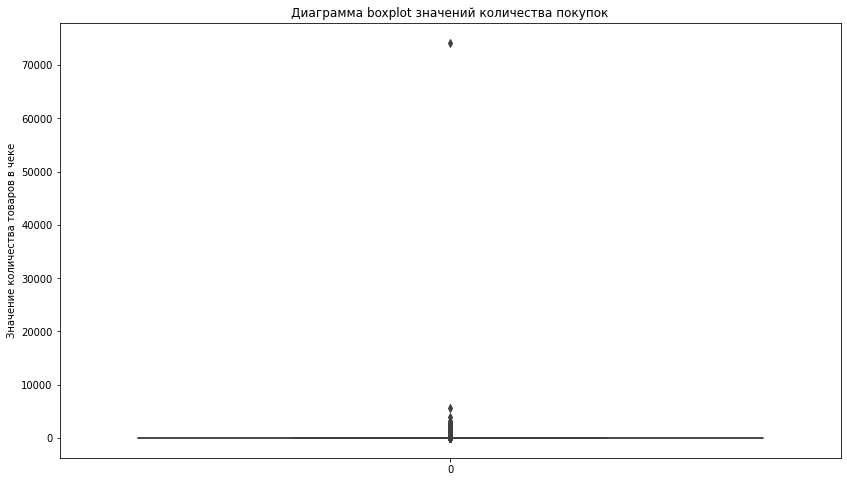

In [34]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data['quantity'])
plt.title('Диаграмма boxplot значений количества покупок')
plt.ylabel('Значение количества товаров в чеке')
plt.show()

Из диаграммы абсолютно не возможно сделать какие-либо выводы, большого по своему значению единичного выброса. Определим 1%  значений, котрые явно выбиваются из общего датасета.

In [35]:
percentile_quantity = np.percentile(abs(data['quantity']), 95)
percentile_quantity

39.0

Из анализа перцентелей можно сделать вывод, что лишь 5% датсета имеют значения количества товара выше 95 единиц.\
Отсечем выпадающие значения, для дальнейших исследований

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

С учетом того, что мы удаляем и положительные и отрицательные значения, то мы существенно больше 5% в итоге отбросим и это может быть многовато. Вообще снизу тоже перцентилем стоило ограничить и сверху взять не 95, а 99 и тогда отбросили бы получше
</div>

<div class="alert alert-info"> <b>Коментарий студента:
    </b>
Спасибо за замечание.
Учитывая, что на предыдущих этапах отбросили все значения равные и меньше нуля, нижняя граница сама отвалилась :)
    </div>

In [36]:
data=data.query('quantity < @percentile_quantity and quantity > -(@percentile_quantity)')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66357 entries, 0 to 104300
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchaseid       66357 non-null  object        
 1   item_id          66357 non-null  object        
 2   quantity         66357 non-null  int64         
 3   purchasedate     66357 non-null  datetime64[ns]
 4   customerid       66357 non-null  object        
 5   shopid           66357 non-null  object        
 6   loyalty_program  66357 non-null  int64         
 7   price_per_one    66357 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 4.6+ MB


После урезания датафрейма осталось 66357 строк, но остались только качественные значения, которые способствуют корректным и правильным результатам, по которым будут приниматься серьезные решения.

In [37]:
data['quantity'].describe()

count    66357.000000
mean         6.964570
std          7.225377
min          1.000000
25%          2.000000
50%          5.000000
75%         11.000000
max         38.000000
Name: quantity, dtype: float64

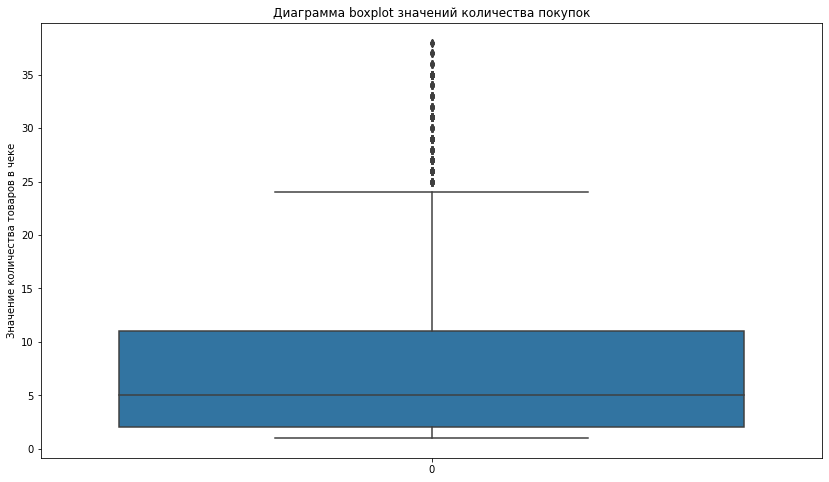

In [38]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data['quantity'])
plt.title('Диаграмма boxplot значений количества покупок')
plt.ylabel('Значение количества товаров в чеке')
plt.show()

Таким образом на диаграмме boxplot лучше стало видно основную массу значений, медиану и часть выбросов, которые оказались выше третьего квартиля.\
Из диаграммы видно, что основная масса покупателей оформляют от 2-х до 11-ти товаров. И только 35% всех покупателей оформляет от 12-ти до 38-ми единиц товаров.

### Добавление значений месяца формирования чека

Для упрощения дальнейшей работы по фильтрации данных создадим столбец с месяцем формирования чека purchase_month

In [39]:
data['purchase_month']=pd.DatetimeIndex(data['purchasedate']).month
data.head(10)

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,price_per_one,purchase_month
0,538280,21873,11,2016-12-10 12:50:00,18427.0,shop 0,0,1.63,12
2,540418,21873,1,2017-01-07 11:04:00,not_reg,shop 0,0,1.63,1
3,541516,21873,2,2017-01-18 17:34:00,not_reg,shop 0,0,1.63,1
4,541566,21873,35,2017-01-19 11:50:00,23401.0,shop 0,1,1.63,1
5,538843,21873,1,2016-12-14 13:18:00,21712.0,shop 0,0,1.63,12
6,540838,21873,11,2017-01-11 15:13:00,19541.0,shop 0,0,1.63,1
7,543592,21873,5,2017-02-10 11:57:00,22922.0,shop 0,1,1.63,2
10,540480,21873,11,2017-01-07 15:27:00,18159.0,shop 4,0,1.63,1
17,539252,21873,35,2016-12-16 14:17:00,23423.0,shop 0,1,1.63,12
18,543984,21873,11,2017-02-15 09:35:00,21280.0,shop 0,0,1.63,2


### Расчет суммы покупки

Для расчета стоимости покупки добавим столбец purchase_amount

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66357 entries, 0 to 104300
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchaseid       66357 non-null  object        
 1   item_id          66357 non-null  object        
 2   quantity         66357 non-null  int64         
 3   purchasedate     66357 non-null  datetime64[ns]
 4   customerid       66357 non-null  object        
 5   shopid           66357 non-null  object        
 6   loyalty_program  66357 non-null  int64         
 7   price_per_one    66357 non-null  float64       
 8   purchase_month   66357 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 7.1+ MB


In [41]:
data['purchase_amount'] = data['quantity'] * data['price_per_one']
data.head(10)

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,price_per_one,purchase_month,purchase_amount
0,538280,21873,11,2016-12-10 12:50:00,18427.0,shop 0,0,1.63,12,17.93
2,540418,21873,1,2017-01-07 11:04:00,not_reg,shop 0,0,1.63,1,1.63
3,541516,21873,2,2017-01-18 17:34:00,not_reg,shop 0,0,1.63,1,3.26
4,541566,21873,35,2017-01-19 11:50:00,23401.0,shop 0,1,1.63,1,57.05
5,538843,21873,1,2016-12-14 13:18:00,21712.0,shop 0,0,1.63,12,1.63
6,540838,21873,11,2017-01-11 15:13:00,19541.0,shop 0,0,1.63,1,17.93
7,543592,21873,5,2017-02-10 11:57:00,22922.0,shop 0,1,1.63,2,8.15
10,540480,21873,11,2017-01-07 15:27:00,18159.0,shop 4,0,1.63,1,17.93
17,539252,21873,35,2016-12-16 14:17:00,23423.0,shop 0,1,1.63,12,57.05
18,543984,21873,11,2017-02-15 09:35:00,21280.0,shop 0,0,1.63,2,17.93


### Выводы по разделу

На начальном этапе были подключены необходимые библиотеки по обработке данных и построению графиков.\
После чего в переменные retail_dataset и product_codes были загружены полученные данные выгрузок в формате csv.\
Проведена работа по обзору данных и получение первых сведений о их составе, формате и качеству.\
Далее в работе были перемены инструменты и методы позволившие привести наименование строк и столбцов к форме хорошего тона.
Также датасет product_codes был очищен от дубликатов и заменены значения цен на расценки, рассчитанные по медиане.\
После чего датасеты был объединены в единый информационный датафрейм data.э
В дальнейшем, данные были очищены от дубликатов, заполнены пропуски, усечены аномальные выбросы.\
И в заключении добавлены данные по месяцу формирования чека, а также суммы покупки.

По итогу проделанной работы из 105335 строк первоначальных данных были получены 68275 строк без дубликатов, пропусков и ошибочных данных. Потери данных составили 64,81%, это весьма существенно. Основная потеря данных произошла на этапе очистки датасета от ошибочного значения количества товаров, которое было равно нулю.\
Несмотря на это, решение об очисте от ошибочных данных позволит более качественно сделать анализ и оценить результаты.


##  Исследовательский анализ данных

###  Обзор периода исследования

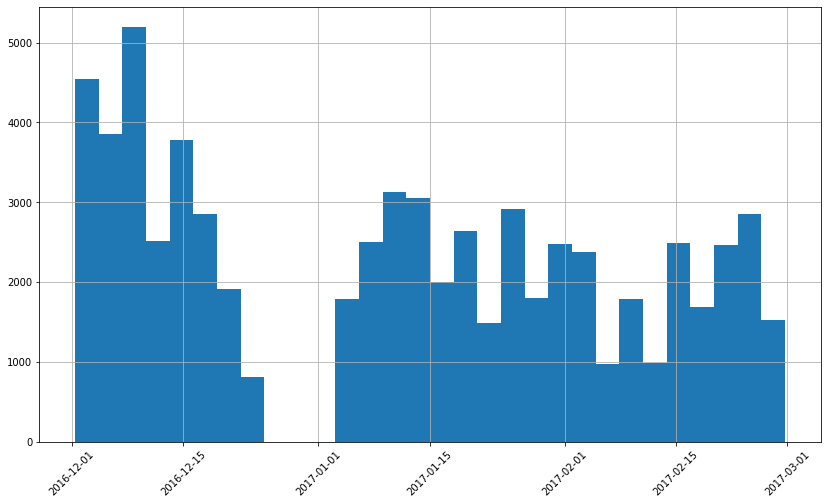

In [42]:
plt.figure(figsize=(14, 8))
data['purchasedate'].hist(bins=30)
plt.xticks(rotation=45)
plt.show();

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Давай настроим количество корзин в гистограмме, чтобы более точный график получился

</div>

<div class="alert alert-info"> <b>Коментарий студента:
    </b>
Спасибо за замечание. Исправил.

Налицо интрига получается! :) Что за просвет где-то с 23.12.2016 по 04.01.2017? Они что, вообще перестали работать перед праздниками? Во, чудаки:)
    </div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

+

</div>

In [43]:
print(f' Минимальная дата данных: {data.purchasedate.min()}')
print(f' Максимальная дата данных: {data.purchasedate.max()}')

 Минимальная дата данных: 2016-12-01 08:26:00
 Максимальная дата данных: 2017-02-28 17:01:00


Таким образом обозреваемый период находится в пределах с 2016-12-01 08:26:00 по 2017-02-28 17:01:00

Также на графике замечен пробел данных в период с 23.12.2016 по 04.01.2017. Проверим наличие данных за этот период.

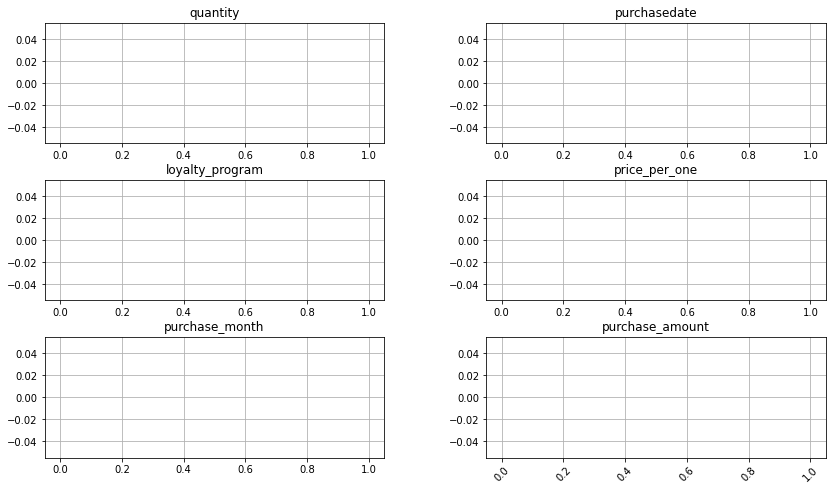

In [44]:
data.query('purchasedate > "2016-12-24 00:00:00" and purchasedate < "2017-1-4 00:00:00"').hist(bins=30, figsize=(14, 8))
plt.xticks(rotation=45)
plt.show();


В полученном срезе действительно нет данных. Возможно был сбой системы регистрации продаж, но также возможно предприятие в предновогодний и новогодний период просто прекратило продажи по внутренним причинам. Данное обстоятельство требует уточнения у заказчика, с целью выяснения, а возможно и недопущения причин возникновения пробелов.

<div class="alert alert-warning">
    
**Комментарий ревьюера - 2**

**#можно лучше**

Графиками как-то не очень решение. Посчитать и получить 0 рабочих дней как-то логичнее, чем пустые графики
</div>

<div class="alert alert-info"> <b>Коментарий студента:
    </b>
Спасибо за замечание. Ты права. учту в дальнейшей своей работе. Сейчас сосредоточил усилия на замечаниях об учете продаж карты лояльности в LTV и исправлении стат анализа.
    </div>

### Обзор уникальных значений магазинов

In [45]:
print ('Список уникальных магазинов: ''{}'.format(data['shopid'].unique()))

Список уникальных магазинов: ['shop 0' 'shop 4' 'shop 5' 'shop 15' 'shop 2' 'shop 10' 'shop 8' 'shop 9'
 'shop 6' 'shop 28' 'shop 12' 'shop 22' 'shop 1' 'shop 11' 'shop 19'
 'shop 18' 'shop 7' 'shop 27' 'shop 3' 'shop 13' 'shop 26' 'shop 17'
 'shop 16' 'shop 14' 'shop 24' 'shop 20' 'shop 25' 'shop 30' 'shop 21'
 'shop 29']


In [46]:
print ('Всего в дадасете уникальных магазинов: ''{}'.format(data['shopid'].nunique()))

Всего в дадасете уникальных магазинов: 30


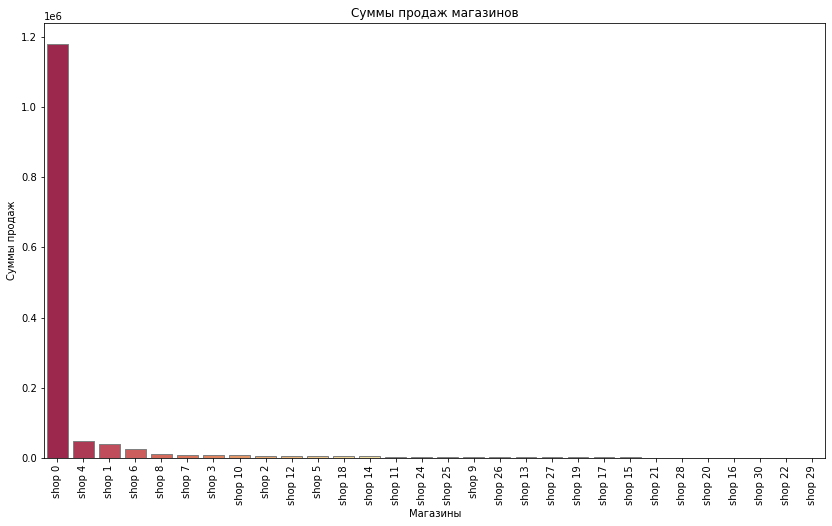

In [47]:
store_sales_amounts = data.groupby('shopid', as_index=False)['purchase_amount']\
    .sum().sort_values(by='purchase_amount', ascending=False)
plt.figure(figsize=(14, 8))
#sns.set (font_scale=1.5)
ax=sns.barplot(y='purchase_amount', x="shopid",  data=store_sales_amounts, palette='Spectral', ec="gray")

plt.title('Суммы продаж магазинов')
plt.xlabel('Магазины')
plt.ylabel('Суммы продаж')
plt.xticks(rotation=90)
plt.show()


Из графика видно что в основном продажи идут через магазин "shop 0"

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Хорошо, магазины верно проанализированы
</div>

###  Обзор уникальных значений программ лояльности

In [48]:
print('Зарегистрированные уникальные программы лояльности: ' '{}'.format(data.loyalty_program.unique()))

Зарегистрированные уникальные программы лояльности: [0 1]


В датасете есть только две программы, причем 0 это признак не участие в программе лояльности покупателем, а 1 это участи в программе лояльности покупателем.

### Количество покупателей в разрезе категорий по признаку участия в программе лояльности

In [49]:
print('Количество уникальных пользователей не принимающих участие в программе лояльности: ''{}'\
      .format(data.query('loyalty_program == 0')['customerid'].nunique()))
print('Количество уникальных пользователей принимающих участие в программе лояльности: ''{}'\
      .format(data.query('loyalty_program == 1')['customerid'].nunique()))

Количество уникальных пользователей не принимающих участие в программе лояльности: 1070
Количество уникальных пользователей принимающих участие в программе лояльности: 544


Проверим, сколько чеков оформила каждая когорта пользователей:

In [50]:
data.pivot_table(index='loyalty_program', columns='purchase_month', values='purchaseid'
                 , aggfunc='nunique', margins= True , margins_name='sum')

purchase_month,1,2,12,sum
loyalty_program,,,,
0,745,703,971,2419
1,274,308,480,1062
sum,1019,1011,1451,3481


Из полученных агрегированных данных видно, что количество уникальных покупателей внутри каждого месяца в когорте не принимающих участия в программе лояльности, постепенно снижается с декабря по февраль. Потери в январе 226 покупателя, в феврале 42 покупателя. Общий уровень падения за рассматриваемый период составил 268 покупателя.
Тренд на уменьшения количества покупателей присущь и когорте покупателей, которые приняли участие в программе лояльности. В декабре потери составили 206 покупателя, в феврале небольшой отскок и прирост на 34 покупателея, но при этом общий уровень потерь составил 172 покупателей за период.\
Суммарно магазин в январе теряет 432 покупателя и 8 в феврале. Суммарные потери магазина в количестве покупателей составило 440 пользователей. Это 30% потерь от декабрьской базы.\
Интересным было бы посмотреть посетителей, не принимающих участие в программе лояльности, которые не регистрировались в магазине.


In [51]:
data.query('customerid == "not_reg"').pivot_table(index='loyalty_program', columns='purchase_month', values='purchaseid'
                                                  , aggfunc='nunique', margins= True , margins_name='sum')

purchase_month,1,2,12,sum
loyalty_program,,,,
0,103,95,154,352
sum,103,95,154,352


В данном срезе также присутствует тренд на уменьшение покупателей. Причем незарегистрированных пользователей составляет 10% от общего числа всех клиентов, что немало и эта категория требует дополнительного внимания.

Важно посмотреть на финансовую составляюшую в рассматриваемом периоде по кагортам.

### Обзор суммы покупок в разрезе категорий покупателей по признаку участия в программе лояльности

Потери в количестве пользователей еще не означают финансовые потери. Эта часть бизнеса является критичной. Агрегируем данные по этому показателю. Причем данные будут с учетом возвратов (отрицательных сумм) т.к. это виляет на конечный финансовый результат в целом.

In [52]:
data.pivot_table(index='loyalty_program', columns='purchase_month', values='purchase_amount'
                 , aggfunc='sum', margins= True , margins_name='sum')

purchase_month,1,2,12,sum
loyalty_program,,,,
0,355444.755,271507.275,417020.265,1043972.295
1,96479.795,109614.795,139010.385,345104.975
sum,451924.550,381122.070,556030.650,1389077.270


Из данного обзора можно сделать следующие выводы

    По когорте покупателей, не принимающих участия в программе лояльности:
    1. Сумма продаж в январе, по сравнению с декабрем, снизилась на -61575.51 руб., что составило 15% от базы декабря.
    2. Сумма продаж в феврале существенно упала на -83937.48 руб. к январю, что составило уже -24% падения.
    3. В общей структуре продаж по итогам исследуемого периода, объем покупок данными пользователями составила 75%.

    По когорте покупателей, участвующих в программе лояльности:
    1. Падение продаж в январе, по отношению к базовому декабрю на -42530.59 руб. в абсолюте, и -31% в относительном выражении.
    2. Не большой прирост продаж в феврале на +13135.00 руб., что составило +14% к базе января.
    3. В общей структуре продаж по итогам исследуемого периода, объем покупок данными пользователями составила 25%.

    Итоговые показатели:
    1. Падение общих продаж в январе, по отношению к базе декабря, составили -104106.10 руб. Потери составили -19%.
    2. Усугубление падения суммы продаж в феврале по отношению к базе января -70820.48 руб, что составило еще -16%.
Общий намечающийся тренд не оптимистичен. В поисках точки роста, стоит обратить внимание на количество реализуемого товара.

### Количество товаров в покупках каждой из категории покупателей

Обратим внимание на объемы продаж в количественном выражении. Возможно здесь можно найти оптимистичные точки роста. Причем также будем использовать значения с возвратами (отрицательные значения в столбце quantity), для корректной оценки реально проданного товара.

In [53]:
data.pivot_table(index='loyalty_program', columns='purchase_month', values='quantity'
                 , aggfunc='sum', margins= True , margins_name='sum')

purchase_month,1,2,12,sum
loyalty_program,,,,
0,123077,92327,130902,346306
1,34118,39371,42353,115842
sum,157195,131698,173255,462148


Из данного обзора можно сделать следующие выводы

    По когорте покупателей, не принимающих участия в программе лояльности:
    1. Объем продаж в январе, относительно базы декабря, падают в абсолюте на -7825 ед. товара, что составляет -6% от базы декабря.
    2. Падение объемов продаж в этой группе, продолжается в феврале на -30750 ед. товара, что составляет -25% к базе января
    3. В общей структуре объемов продаж данная категория покупателей приобрела 75% всего товарооборота в магазинах.

    По когорте покупателей, участвующих в программе лояльности:
    1. Объем продаж в январе, относительно базы декабря, падают в абсолюте на -8235 ед. товара, что составляет -19% в категории
    2. Не значительный прирост объемов продаж +5253 ед. товара отиграло падение января на +15%
    3. В общей структуре объемов продаж данная категория покупателей приобрела 25% всего товара в магазинах. 

    Итоговые показатели:
    1. Падение общих продаж в январе, по отношению к базе декабря, составили -16060 ед. товара. Потери составили -9%.
    2. Рецессия объемов продаж продолжилась в феврале и составила к базе января -25497 ед. товара, что составило еще -16%.


### Рейтинг популярности товаров по каждой категории покупателей

Проверим общий топ-10 популярных товаров (с учетом возвратов) за весь период по обеим категориям покупателей

In [54]:
top10_product=data.pivot_table(index='item_id',columns='purchase_month', values='quantity', aggfunc='sum')
top10_product['sum']=top10_product.sum(axis=1)
top10_product.sort_values(by='sum', ascending=False).head(10)

purchase_month,1,2,12,sum
item_id,,,,
85123a,1588.0,1138.0,1983.0,4709.0
21212,932.0,1191.0,903.0,3026.0
22961,706.0,722.0,1224.0,2652.0
84879,707.0,873.0,1001.0,2581.0
85099b,693.0,902.0,693.0,2288.0
22469,698.0,772.0,786.0,2256.0
22197,502.0,503.0,1228.0,2233.0
22423,651.0,525.0,872.0,2048.0
22969,605.0,575.0,842.0,2022.0


Топ-10 товаров покупателей не участвующих в программе лояльности

In [55]:
top10_product_lp0 = data.query('loyalty_program == 0')\
    .pivot_table(index='item_id',columns='purchase_month', values='quantity', aggfunc='sum')
top10_product['sum']=top10_product.sum(axis=1)
top10_product.sort_values(by='sum', ascending=False).head(10)

purchase_month,1,2,12,sum
item_id,,,,
85123a,1588.0,1138.0,1983.0,9418.0
21212,932.0,1191.0,903.0,6052.0
22961,706.0,722.0,1224.0,5304.0
84879,707.0,873.0,1001.0,5162.0
85099b,693.0,902.0,693.0,4576.0
22469,698.0,772.0,786.0,4512.0
22197,502.0,503.0,1228.0,4466.0
22423,651.0,525.0,872.0,4096.0
22969,605.0,575.0,842.0,4044.0


Топ-10 товаров покупателей участвующих в программе лояльности

In [56]:
top10_product_lp1 = data.query('loyalty_program == 1')\
    .pivot_table(index='item_id',columns='purchase_month', values='quantity', aggfunc='sum')
top10_product['sum']=top10_product.sum(axis=1)
top10_product.sort_values(by='sum', ascending=False).head(10)

purchase_month,1,2,12,sum
item_id,,,,
85123a,1588.0,1138.0,1983.0,14127.0
21212,932.0,1191.0,903.0,9078.0
22961,706.0,722.0,1224.0,7956.0
84879,707.0,873.0,1001.0,7743.0
85099b,693.0,902.0,693.0,6864.0
22469,698.0,772.0,786.0,6768.0
22197,502.0,503.0,1228.0,6699.0
22423,651.0,525.0,872.0,6144.0
22969,605.0,575.0,842.0,6066.0


Обе когорты покупателей предпочитают покупать одни и те же товары, что подтверждается общим и частными рейтингами

### Выводы по разделу

Исследовательский анализ данных показал следующие результаты:
1.	Обозреваемый период составляет с 01.12.2016 08:26:00 по 28.02.2017 17:04:00 В которм обнаружен пробел данных в период с 23.12.2016 по 04.01.2017
2.	В обзоре учувствует 30 магазинов сети, из которых один shop 0 наиболее популярен
3.	Всего действует одна программа лояльности, которая кодируется в столбце loyalty_program значением 1. Значение 0 означает, что покупатель не принимает участие в программе лояльности
4.	Количество пользователей не участвующих в программе 1070 пользователей. Количество пользователей из программы лояльности составляет 544.
5.	Количество пользователей каждый месяц становится меньше. Общие потери составили 440 покупателя. Однако в феврале был небольшой прирост в когорте лояльных пользователей +34, что последствии положительно повлияло на финансовые показатели в данной группе. Причины локального роста необходимо дополнительно изучить, для возможного примера точки роста спроса.
6.	Суммы продаж от месяца к месяцу также снижаются, что должно насторожить руководство магазина. Потери в выручке составили -174908.58 руб. к базе декабря, накопительным способом. Также как и с количеством прироста пользователей с картами лояльности, в феврале был небольшой рост выручки. Это также необходимо включать в анализ причин.
7.	Количество реализованного товара также снижается от месяца к месяцу и суммарно составили -41557 ед. товара, по отношению к базе декабря. Также в группе лояльных клиентов был локальный прирост в феврале, который коррелирует с приростом покупателей в этом месяце.
8.	Топ-10 товаров, покупаемых обеими когортами покупателей, абсолютно идентичны.


Т.о. можно сделать предварительные выводы о том, что магазин теряет вы пользователях, в выручке и объемах продаж. Однако есть локальный положительный пример в феврале в группе покупателей с картами лояльности, который необходимо изучить, с целью повышения продаж сети магазинов. Также необходимо изучить практику продаж магазина shop 0 который в сотни раз продает больше остальных магазинов сети.


<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

В целом ты хорошо все описыыаешь, но я бы какую-то визуализацию добавила... Просто таблицы и набор чисел очень трудно воспринимать большинству людей
</div>

<div class="alert alert-info"> <b>Коментарий студента:
    </b>
Спасибо за замечание. Но мне кажется как раз визуализация будет здесь лишней. Лучше всего показывают таблицы с итоговыми значениями по обеим осям.
    </div>

## Работа с метриками и бизнес-показателями

###  Расчёт среднего чека покупателей в разрезе категорий по признаку участия в программе лояльности

Агрегируем данные в переменную аverage_check, из data, предварительно отфильтровав отрицательные значения purchase_amount (возвраты) т.к. они исказят значения среднего чека.

In [57]:
аverage_check=data.groupby(['loyalty_program', 'purchase_month', 'purchaseid'], as_index=False)['purchase_amount'].agg({'sum'})
аverage_check=round(аverage_check.pivot_table(
    index='loyalty_program', columns='purchase_month', values='sum', aggfunc='mean'),2)
аverage_check.columns=('январь 2017','февраль 2017','декабрь 2016')
аverage_check=аverage_check[['декабрь 2016','январь 2017','февраль 2017']]
аverage_check

,декабрь 2016,январь 2017,февраль 2017
loyalty_program,,,
0,429.48,477.11,386.21
1,289.60,352.12,355.89


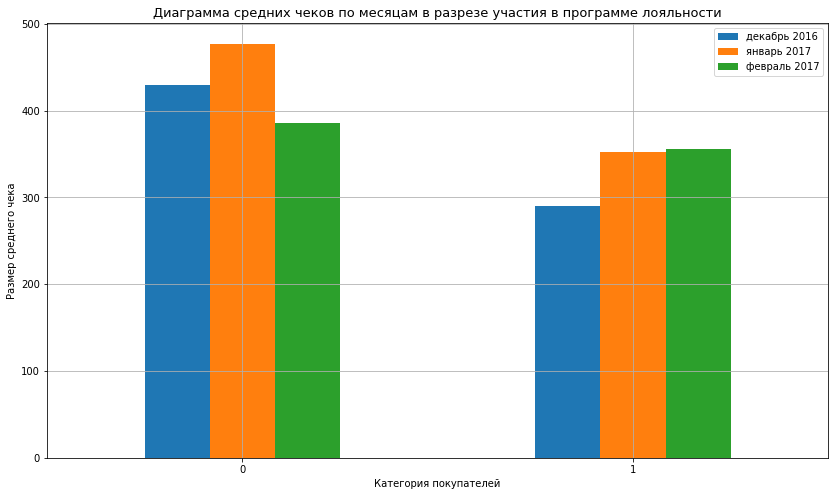

In [58]:
аverage_check.plot(kind='bar', grid=True, figsize=(14, 8), legend = True,)
plt.title ('Диаграмма средних чеков по месяцам в разрезе участия в программе лояльности', fontsize=13)
plt.xlabel('Категория покупателей')
plt.ylabel('Размер среднего чека')
plt.xticks(rotation=0)
plt.show();

Как видно из результатов агрегации и графика, уровень среднего чека у покупателей программы лояльности на протяжении трех месяцев, ниже чем у покупателей еще не вступивших в нее. Возможно здесь сказывается короткий тестовый период и на более длительном временном лаге картина поменяется, но за прошедшие месяцы внедрения программы, результаты такие, как есть.

    Результаты среднего чека покупателей без карты лояльности:
    1. Примечательно, что средний чек декабря уступает по уровню, такому же показателю января на 11%, что скорее всего объяснимо новогодними каникулами, выплатами премий и наличия свободного времени у розничного покупателя.
    2. Снижение уровня февраля по отношению к январю на 19%, а также по отношению к декабрю на 10%, объяснимо снижением деловой активности конца предыдущего года, а также тратами розничного посетителя в январе.
        
    Результаты среднего чека покупателей с картой лояльности:
    1. После внедрения программы лояльности в декабре, заметен рост среднего чека в январе на 22%, по сравнению с декабрем. На это могли повлиять те же факторы, как в случае с покупателями без карт лояльности.
    2. В феврале небольшой рост на 1% выглядит лучше, чем спад у покупателей не участвующих в программе лояльности.



<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Средний чек рассчитан не верно, т.к. собственно агрегацию по чеку ты в своих расчетах не делаешь

</div>

<div class="alert alert-info"> <b>Коментарий студента:
    </b>
Не сразу понял в чем была моя ошибка, но сейчас надеюсь, что все сделал правильно.  
    </div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

Да, теперь верно
</div>

###  Расчёт среднего количества покупателей в день по признаку участия в программе лояльности

Изучим среднее количество покупателей в день в декабре 2016, январе 2017 и феврале 2017. А также сравним между собой данные по месяцам и в разрезе участия в программе лояльности.

In [59]:
mdile_visitors =  data.pivot_table(index='loyalty_program', columns='purchase_month', values='customerid', aggfunc='nunique')
mdile_visitors[1] = round(mdile_visitors[1]/31, 2)
mdile_visitors[2] = round(mdile_visitors[2]/28, 2)
mdile_visitors[12] = round(mdile_visitors[12]/31, 2)
mdile_visitors.columns = ('январь 2017','февраль 2017','декабрь 2016')
mdile_visitors = mdile_visitors[['декабрь 2016','январь 2017','февраль 2017']]
mdile_visitors

,декабрь 2016,январь 2017,февраль 2017
loyalty_program,,,
0,17.39,15.74,16.82
1,10.03,7.16,8.75


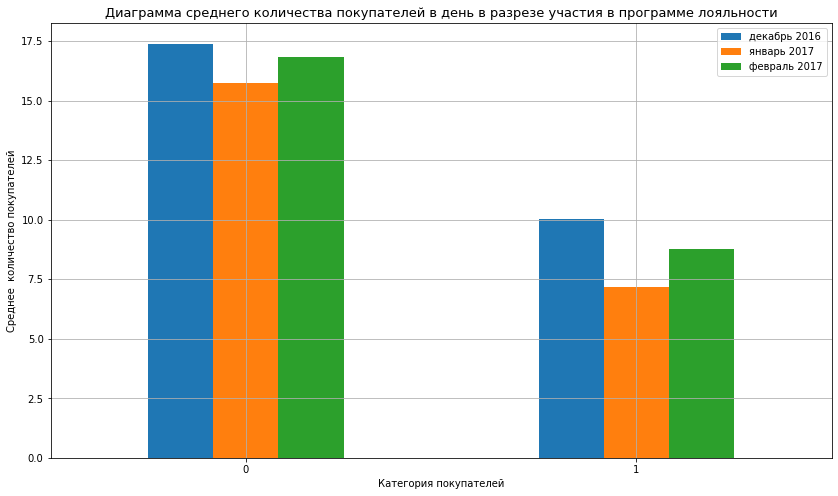

In [60]:
mdile_visitors.plot(kind='bar', grid=True, figsize=(14, 8), legend = True,)
plt.title ('Диаграмма среднего количества покупателей в день в разрезе участия в программе лояльности', fontsize=13)
plt.xlabel('Категория покупателей')
plt.ylabel('Среднее  количество покупателей')
plt.xticks(rotation=0)
plt.show();

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Хорошо, но не уверена, что это показательный момент, т.к. у нас сейчас тестовый период программы лояльности и участников с лояльностью все равно будет намного меньше, чем без нее
</div>

<div class="alert alert-info"> <b>Коментарий студента:
    </b>
Очень верное замечание. Возможно, надо было бы рассмотреть показатель количества товара на одно покупателя в каждой из когорт. Жаль, что поздновато доперло...
    </div>

Из диаграммы среднего количества покупателей в день в разрезе участия в программе лояльности можно сделать следующие заключения:

    В группе покупателей не участвующих в программе лояльности:
    1. Общий средний уровень покупателей в день, не участвующих в программе лояльности, значительно больше
    2. В декабре 2016 в среднем покупателей в день было больше чем в остальные месяцы.
    3. В январе 2017 покупателей было меньше, что скорее всего обусловлено отпусками и каникулами.
    4. В феврале 2017 произошел рост, до уровня предновогоднего декабря 2016 не дошел.

    В группе покупателей, пользующихся программой лояльности:
    1. Общий уровень среднего посещения в день, почти в два раза меньше покупателей без карт лояльности.
    2. Декабрь 2016 в данной когорте, был лучше последующих месяцев
    3. Январь 2017, также как и в противоположной когорте, оказался провальным и посетителей было существенно меньше. Причем разрыв с декабрем 2016 был существеннее, чем в группе без карт лояльности.
    4. В феврале 2017 произошел рост, но до уровня декабря не поднялся. Скорее всего это обусловлено коротким месяцем (28 дней) и еще не окрепшим спросом после новогоднего января.


###  Расчёт пожизненной ценности клиента LTV в зависимости от участия в программе лояльности

Порядок расчета LTV:
1.	Получить пользовательские профили и данные о покупках. (profiles и purchases)
2.	Добавить данные о покупках в профили.
3.	Рассчитать лайфтайм пользователя для каждой покупки.
4.	Построить таблицу выручки. То есть сводную таблицу, в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — выручка.
5.	Посчитать сумму с накоплением для каждой строки таблицы выручки.
6.	Вычислить размеры когорт и занести результаты в отдельную таблицу.
7.	Объединить таблицы размеров когорт и выручки.
8.	Посчитать LTV: разделить каждую «ячейку» таблицы выручки на соответствующий размер когорты.


#### Формирование профилей покупателей

Для расчета LTV необходимо сформировать профили пользователей с данными первого посещения. Сгруппируем данные из data и методом first найдем первые даты, когда покупатель совершил покупку. Результат запишем в переменную profiles

In [328]:
profiles = data.sort_values(by=['customerid', 'purchasedate']).groupby(['customerid', 'loyalty_program'])\
        .agg({'purchasedate': 'first'})\
        .reset_index()
profiles = profiles.rename(columns={'customerid':'user_id', 'purchasedate': 'first_ts', 'loyalty_program':'cohort'})

# определяем дату первого посещения
profiles['dt'] = profiles['first_ts'].dt.date
# определяем первый день месяца, в который произошла покупка
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
profiles.head(10)

,user_id,cohort,first_ts,dt,month
0,18026.0,0,2016-12-07 14:57:00,2016-12-07,2016-12-01
1,18027.0,0,2016-12-16 19:09:00,2016-12-16,2016-12-01
2,18029.0,0,2017-02-02 16:01:00,2017-02-02,2017-02-01
3,18031.0,0,2017-02-16 12:33:00,2017-02-16,2017-02-01
4,18035.0,0,2017-01-18 09:50:00,2017-01-18,2017-01-01
5,18038.0,0,2017-01-12 12:43:00,2017-01-12,2017-01-01
6,18040.0,0,2017-02-25 13:51:00,2017-02-25,2017-02-01
7,18041.0,0,2017-02-17 10:30:00,2017-02-17,2017-02-01
8,18044.0,0,2017-02-21 13:51:00,2017-02-21,2017-02-01
9,18049.0,0,2016-12-14 12:58:00,2016-12-14,2016-12-01


#### Формирования продаж в разрезе покупателей

Также для расчёта LTV необходимо сформировать данные о покупках посетителей. Данные также возьмем из датафрейма data и запишем в переменную purchases

In [313]:
purchases =  data.query('purchase_amount > 0').groupby(['customerid', 'purchasedate'], as_index=False)['purchase_amount']\
    .agg('sum')
# Добавим данные с первым днем месяца совершения покупки:
#purchases['month'] = purchases['purchasedate'].astype('datetime64[M]')
purchases = purchases.rename(columns={'customerid':'user_id', 'purchasedate': 'event_dt', 'purchase_amount': 'revenue'})
purchases

,user_id,event_dt,revenue
0,18026.0,2016-12-07 14:57:00,955.350
1,18026.0,2017-01-26 14:30:00,781.170
2,18027.0,2016-12-16 19:09:00,171.900
3,18027.0,2017-01-25 10:42:00,28.865
4,18029.0,2017-02-02 16:01:00,386.180
...,...,...,...
3430,not_reg,2017-02-28 10:15:00,144.225
3431,not_reg,2017-02-28 14:19:00,197.785
3432,not_reg,2017-02-28 16:47:00,621.325
3433,not_reg,2017-02-28 16:50:00,539.410


Добавим к данным информацию о покупках карт лояльности соответствующим пользователям, для этого сформируем отельную таблицу в которую войдут id покупателей, , дата совершения первой покупки и стоимость карты лояльности в размере 200 руб.\
Полученные данные присоединим к таблице purchases

In [329]:
loyalty_card = purchases.loc[purchases['user_id'].isin(profiles.query('cohort == 1')['user_id'].unique())]\
   .groupby('user_id')\
    .agg({'first'})\
    .reset_index()
loyalty_card.columns=('user_id', 'event_dt', 'revenue')
loyalty_card['revenue']=200

In [330]:
loyalty_card

,user_id,event_dt,revenue
0,22005.0,2017-01-09 12:01:00,200
1,22006.0,2016-12-05 12:43:00,200
2,22011.0,2017-02-07 14:16:00,200
3,22018.0,2017-02-28 13:41:00,200
4,22029.0,2017-01-10 09:44:00,200
...,...,...,...
539,23936.0,2017-02-16 15:13:00,200
540,23938.0,2016-12-08 13:38:00,200
541,23939.0,2016-12-16 18:23:00,200
542,23948.0,2016-12-08 13:53:00,200


In [331]:
purchases=pd.concat([purchases,loyalty_card])
purchases.sort_values(by='event_dt')

,user_id,event_dt,revenue
2869,23529.0,2016-12-01 08:26:00,186.515
425,23529.0,2016-12-01 08:26:00,200.000
425,23529.0,2016-12-01 08:26:00,200.000
2870,23529.0,2016-12-01 08:28:00,19.750
405,18726.0,2016-12-01 08:34:00,381.485
...,...,...,...
3433,not_reg,2017-02-28 16:50:00,539.410
3434,not_reg,2017-02-28 16:59:00,479.605
319,23141.0,2017-02-28 17:01:00,200.000
319,23141.0,2017-02-28 17:01:00,200.000


#### Формирование функции для расчтеа LTV
Для автоматизации процесса, а также экономии кода, напишем фунцию для расчета LTV, с группировкой по когортам и динамикой.

In [332]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date=observation_date-timedelta(days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитать LTV        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

#### Ввод начальных расчетных параметров

In [333]:
# Период наблюдения
analysis_horizon = datetime(2017, 2, 28).date()
# Горизонт наблюдения
horizon_days = 30
# Категоризация покупателей в кагорты
dimensions = ['cohort']

#### Получим расчетные данные LTV
Вызовем функцию расчета LTV, задав расчетные параметры

In [334]:
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, purchases, analysis_horizon, horizon_days, dimensions)

#### Построим графики LTV и динамики LTV покупателей

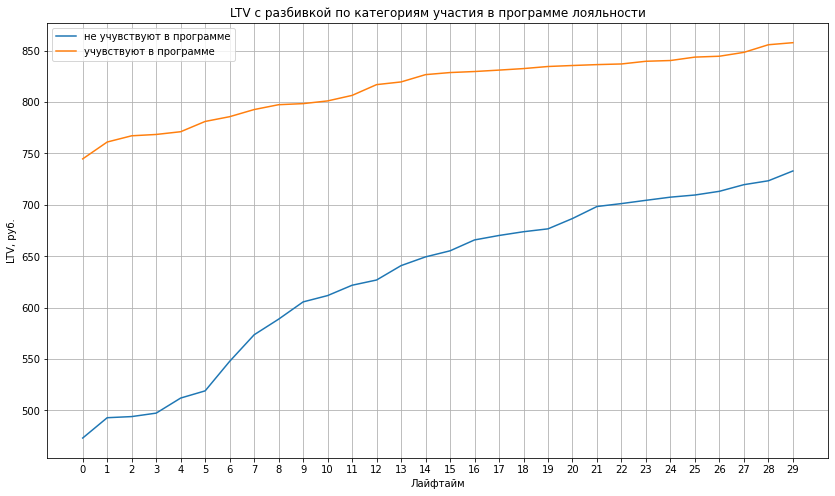

In [335]:
# строим кривые LTV

report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(14, 8), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по категориям участия в программе лояльности')
plt.ylabel('LTV, руб.')
plt.xlabel('Лайфтайм')
plt.legend(['не учувствуют в программе', 'учувствуют в программе'])
plt.show()

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

При анализе LTV нужно учесть, что участие в программе лояльности платное - 200р в месяц и это должно войти именно в LTV
</div>

<div class="alert alert-info"> <b>Коментарий студента:
    </b>
        Вера, позволь с тобой не согласится.

Во-первых, как таковы покупок карт лояльности не фигурирует в данных. Там нет ни одного товара за 200 руб. т.е. эта продажа никак не фиксируется.

Во-вторых, мы не знаем условия акции, чтобы полноценно утверждать, что 200 руб., это чистая покупка, а не завуалированная продажа в цене товара и таким образом ее стоимость уже учтена в стоимости товара.

В-третьих, если продажа карты лояльность есть отдельный процесс, то (опять же не зная условия программы лояльности) можно утверждать, что при ее покупке, цены на товар будут ниже и это влечет за собой снижение маржи, а это опять должно было бы отразится в чеке.

Ну и в-четвертых, в силу того, что данные о стоимости достаточно корявые (не имеют фиксации времени возникновения новой цены), то мы их усреднили через медиану, тем самым вообще сломав по сути принцип программы и ее влияния на маржинальность когорт. И как результат, мы получаем вообще по сути странный коэффициент пожизненной ценности, т.к. средний чек у нас кривой...

В таком случае, не учитывая непонятную продажу карт, мы сравниваем группы между собой, по сути, в критерии объемов покупок при равной цене.
</div>

<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**

В описании акции сказано. Стоимость участия в программе лояльности плтное - 200 р в месяц.

Эта стоимость долдна отразиться в LTV, т.к. это выручка, которую мы получаем от покупателей.

Да, продажа карты в наших данных не отмечена, поэтому ее надо добавить отдельно. Она не размазывается по чекам и товарам, это отдельная оплата, которая идет судя по всему не через кассовый аппарат, поэтому у нас и не отражена
</div>

<div class="alert alert-info"> <b>Коментарий студента - 2:
    </b>
        Я добавил информацию о покупке карты лояльности на этапе формирования данных для функции расчета LTV
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 3**

**#ок**

+

</div>

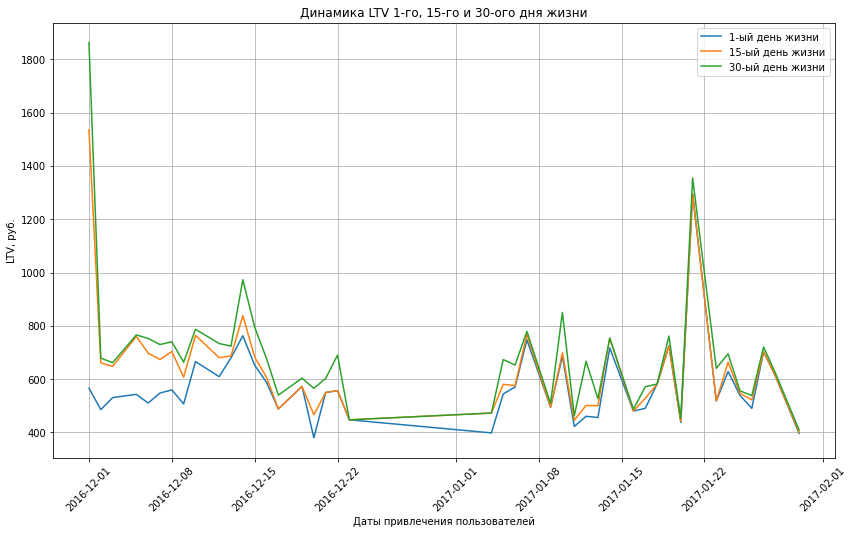

In [337]:
# строим график истории изменений LTV

report = ltv_history[[0, 14, 29]]  # делаем срез данных
report.plot(grid=True, figsize=(14, 8))
plt.title('Динамика LTV 1-го, 15-го и 30-ого дня жизни')
plt.ylabel('LTV, руб.')
plt.xlabel('Даты привлечения пользователей')
plt.legend(['1-ый день жизни', '15-ый день жизни', '30-ый день жизни'])
plt.xticks(rotation=45)
plt.show()

### Выводы по разделу

В результате обработки данных и вычисления LTV (пожизненной ценности покупателя) в разрезе когорт участия или не участия в программе лояльности можно сделать следующие вводы:
1.	Оба коэффициента имеют правильный, нормальный рост, что говорит о корректности проведения расчетов
2.	Коэффициент LTV покупателей не из программы лояльности значительно выше, нежели у посетителей с катами лояльности, что обусловлено большим количеством таких клиентов, а также стартом программы в декабре 2016 года.
3.	Рост ценности клиента не обладающего картой лояльности, менее динамичен, по сравнению с покупателями, участвующими в программе.
4.	Клиенты по программе лояльности в любом случае делают положительный вклад, несмотря на отставание в динамике роста. А учитывая темп прироста LTV можно предположить скорую смену лидерства по данному бизнес-показателю.

По оценке динамики LTV 1-ого, 15-ого, 30-ого дня жизни можно сделать следующие выводы:
1.	Динамика ценности клиентов привлеченных c 01.12.2016 по 14.12.2016, LTV первого дня ниже LTV 15-ого и 30-ого дня. Но в дальнейшем графики практически сливаются.
2.	В общих чертах все динамики практически идентичны, только динамика LTV первого дня ниже динамики LTV 30-ого дня. Но это различие есть только для пользователей привлеченных до 14.12.2016


## Проверка гипотез

### Средний чек участников программы лояльности равен, среднему чеку у остальных покупателей

Т.к. мы будем сравнивать две средние генеральной совокупности, то для тестирования выберем метод T-test, который наиболее точно подходит для данного случая. При этом, равность выборок явно неравна, поэтому будем использовать параметр *equal_var* со значением *False*. 
Для подтверждения варианта тестирования, проверим распределение двух совокупностей  на графике, но перред эти сформируем данные совокупости:


Подготовим выборки с соответствующими группами для тестирования mid_check_0 для покупателей не участвующих в программе лояльности и mid_check_1 для участников программы лояльности.

In [338]:
# группровка данных по признаку программы лояльности и идентификатору чека
ttest_mid_chek=data.groupby(['loyalty_program', 'purchaseid'])['purchase_amount'].agg({'sum'})
ttest_mid_chek.reset_index()

,loyalty_program,purchaseid,sum
0,0,536367,285.395
1,0,536368,96.090
2,0,536369,13.200
3,0,536370,1184.660
4,0,536374,367.350
...,...,...,...
3476,1,545186,171.425
3477,1,545187,155.165
3478,1,545213,184.050
3479,1,545214,218.710


In [339]:
# Сделаем срез данных по чекам покупателй не из программы лояльности
mid_check_0 = ttest_mid_chek.query('loyalty_program == 0')
# Сделаем срез данных по чекам покупателй принимающих участие в программе лояльности
mid_check_1 = ttest_mid_chek.query('loyalty_program == 1')

Построим гистораммы распределения данных:

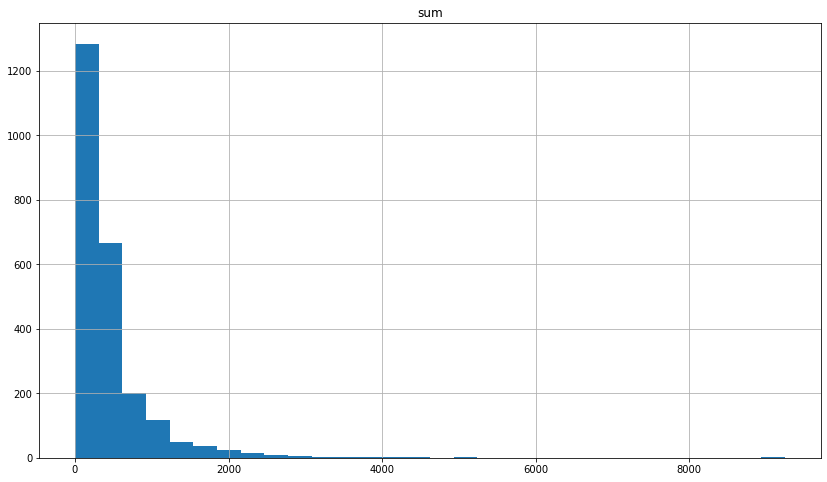

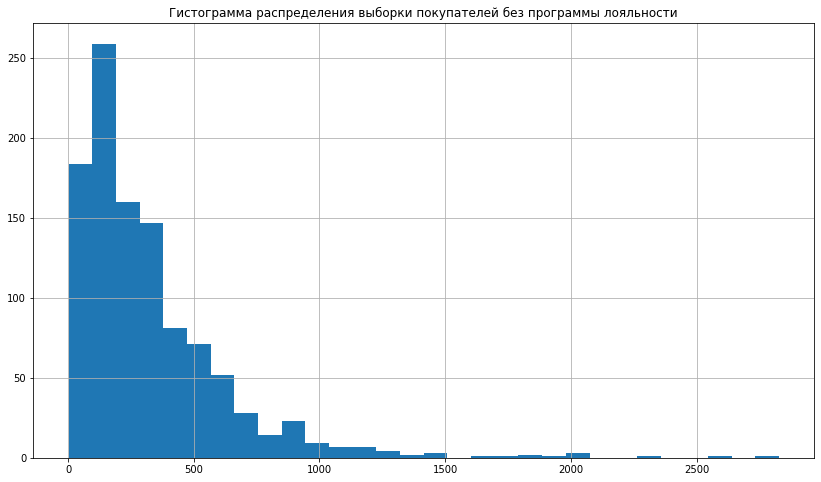

In [340]:
mid_check_0.hist(bins=30, figsize=(14, 8))
mid_check_1.hist(bins=30, figsize=(14, 8))
plt.title('Гистограмма распределения выборки покупателей без программы лояльности')
#plt.legend()
plt.show();

<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**

Для распределения с такими хвостами, какой метод проверки правильнее использовать?
</div>

<div class="alert alert-info"> <b>Коментарий студента - 2:
    </b>
        Мы конечно не очень-то изучали непераметрический U-тест Манна-Уитни, но попробую его испольщовать, так как понял из сторонних источников.
</div>

Проверка гипотезы: о среднем чеке покупателей магазина

```
H_0: Средний чек участников программы лояльности = среднему чеку покупателей не использующих программу лояльности
H_a: Средний чек участников программы лояльности ≠ среднему чеку покупателей не использующих программу лояльности
alpha = 0.05
```

In [353]:
# Зададим alpha, значение уровня значимости
alpha = 0.05

# вызов метода Манна-Уитни для проверки гипотезы 
stat, p = mannwhitneyu(mid_check_0, mid_check_1)

# Выведем значения полученной статистики stat и значения p-value
print('Статистика U-теста = %.3f, p-value = %.3f' % (stat, p))

# Принимаем решение о принятиии/отклонении нулевой гипотезы
if p < alpha:
    print ('Отвергаем нулевую гипотезу ')
else:
    print ('Не получилось отвергнуть нулевую гипотезу ')

Статистика U-теста = 1384857.000, p-value = 0.000
Отвергаем нулевую гипотезу 


Значение статистики равное 1384857 говорит о том, что существуют значительные различия между двумя выборками данных. Значение p равное 0.000 говорит о том, что вероятность случайного возникновения таких различий между выборками крайне мала.

<div class="alert alert-success">
    
**Комментарий ревьюера - 3**

**#ок**

Все верно. Технически использование критерия Манна-Уитни не сильно отличается от ttest-а. Но Манн-Уитни правильнее использовать при наличии выбросов и сильно скошенного распределения

</div>

### Среднее количество купленного товара у посетителей одинаково, не зависимо от участия в программе лояльности

Т.к. мы будем сравнивать две средние генеральной совокупности, то для тестирования выберем метод T-test, который наиболее точно подходит для данного случая. При этом, равность выборок явно неравна, поэтому будем использовать параметр *equal_var* со значением *False*. 
Для подтверждения варианта тестирования, проверим распределение двух совокупностей  на графике, но перред эти сформируем данные совокупости:


<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**

Для сравнения средних есть два метода ttest и Манн-Уитни. Какой из них лучше подходит здесь?

Кроме того, параметр equal_var говорит про равенство дисперсий, а не самих выборок. Если мы его хотим настроить, то нужно эти дисперсии посчитать и оценить
</div>

<div class="alert alert-info"> <b>Коментарий студента:
    </b>
        У нас в теоретической части было особо отмечено, что не рекомендуется проводить тестирована дисперсий, т.к. это может увеличить вероятность сделать неверный вывод. И если можно предположить, что если выборки разного размера, а также дисперсии разные, то используем параметр equal_var = False при вызове метода scipy.stats.ttest_ind()
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 3**

**#ок**

Ок, не нужно делать именно тест на равенство дисперсий, также как не стоит делать тест на нормальность распределения. Но смотреть на выборки и рассчитать сами дисперсии для ttest-а всегда полезно.

В данном случае действительно правильнее использовать критерий Мнна-Уитни, для него дисперсии не нужны

</div>

Сформируем два датасета, разделяющих между собой покупателей с картой лояльности и без нее. Первых запишем в датасет purchases_1, а вторых в purchases_0

In [357]:
ttest_mid_quantity=data.groupby(['loyalty_program', 'customerid'])['quantity'].agg({'sum'})
ttest_mid_quantity.reset_index()

,loyalty_program,customerid,sum
0,0,18026.0,574
1,0,18027.0,120
2,0,18029.0,180
3,0,18031.0,83
4,0,18035.0,491
...,...,...,...
1609,1,23936.0,108
1610,1,23938.0,109
1611,1,23939.0,403
1612,1,23948.0,69


In [358]:
purchases_0=ttest_mid_quantity.query('loyalty_program == 0')
purchases_1=ttest_mid_quantity.query('loyalty_program == 1')

Теперь перейдем к построению гистограмм распределения

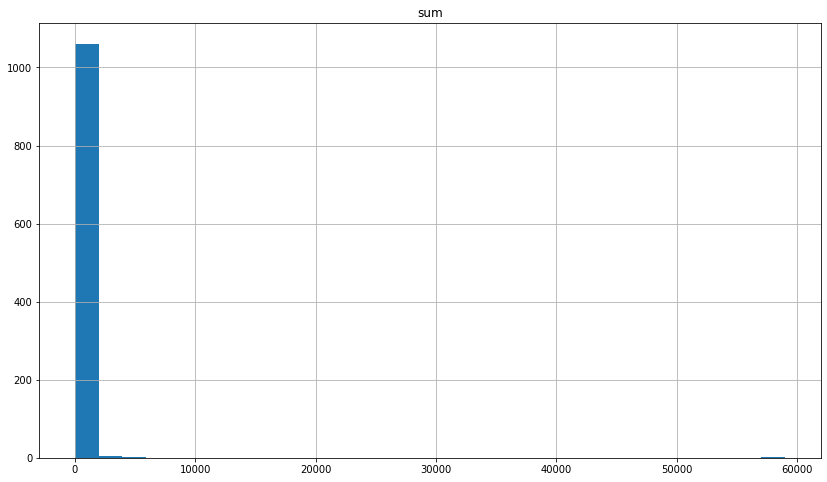

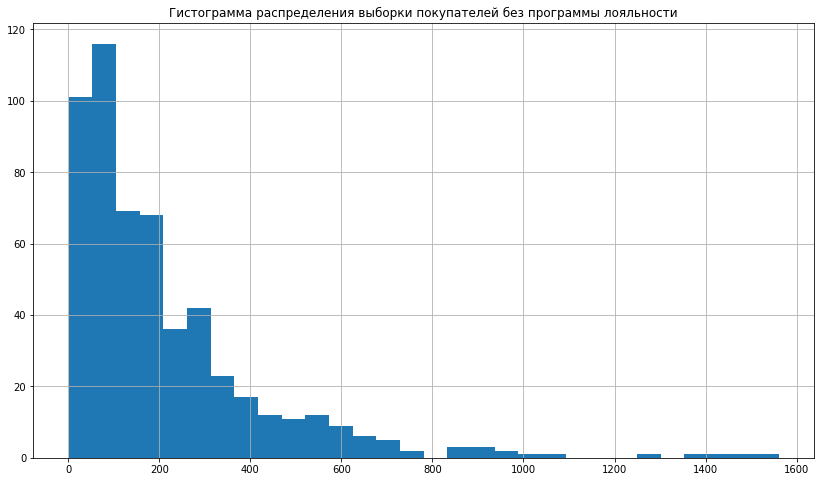

In [359]:
purchases_0.hist(bins=30, figsize=(14, 8))
purchases_1.hist(bins=30, figsize=(14, 8))
plt.title('Гистограмма распределения выборки покупателей без программы лояльности')
#plt.legend()
plt.show();

Проверка гипотезы: о равенстве количества покупок участниками программы лояльности и теми кто не принимает участия в ней.

```
H_0: Среднее количество покупок участников программы лояльности = среднему количеству покупок клиентов не использующих программу лояльности
H_a: Среднее количество покупок участников программы лояльности ≠ среднему количеству покупок клиентов не использующих программу лояльности

alpha = 0.05
```


In [361]:
# Зададим alpha, значение уровня значимости
alpha = 0.05

# вызов метода Манна-Уитни для проверки гипотезы 
stat, p = mannwhitneyu(purchases_0, purchases_1)

# Выведем значения полученной статистики stat и значения p-value
print('Статистика U-теста = %.3f, p-value = %.3f' % (stat, p))

# Принимаем решение о принятиии/отклонении нулевой гипотезы
if p < alpha:
    print ('Отвергаем нулевую гипотезу ')
else:
    print ('Не получилось отвергнуть нулевую гипотезу ')

Статистика U-теста = 302594.500, p-value = 0.192
Не получилось отвергнуть нулевую гипотезу 


Значение статистики 302594.500 говорит о том, что между двумя выборками нет значительных различий. Значение p-value равное 0.192 указывает на то, что вероятность случайного возникновения различий между выборками довольно велика.\
Т.к. p-value превышает зананный кровень значимости alpha, это может означать, что нет оснований считать различия между выборками статистически значимыми.

### Выводы по разделу

Согласно статистическому анализу средних чеков покупателей, участвующих в программе лояльности и не участвующих, гипотеза о разности средних чеков не подтвердилась. Результаты теста говорят о  реальных и не случайных различиях в выборках средних чеков обеих когорт.  Это также означает, что средний чек у двух групп разный. Данное обстоятельство должно натолкнуть на размышления об необходимости продолжения проведения наблюдений за показателем среднего чека в этих различных группах покупателей.

Что же касается количества купленного товара покупателями обеих категорий, то статистический анализ дает ответ о том, что посетители покупают одинаковое количество. По этой причине необходимо проанализировать программу лояльности на предмет мотивации покупателей с катарами лояльности, покупать больше товаров.


<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

1. Нужно поправить расчет среднего чека.

2. Нужно определиться что такое количество покупок? Это количество чеков у пользователя или это количество товаров у пользователя или это количество товаров в чеке? И соответственно правильно рассчитать именно нужный параметр

3. Нужно посмотреть на распределение выборок и выбрать, какой метод мы будем использовать ttest или Манна-Уитни, настроить параметры метода

4. Нужно написать существенные выводы по итогам проверки гипотез. Что полученные результаты дают бизнесу и конкретно нашей задаче?

</div>

<div class="alert alert-info"> <b>Коментарий студента:</b>

Кажется все исправил.
</div>

## Выводы и рекомендации для заказчика

В результате проведения исследовательской работы были изучены данные по продажам за период с 01.12.2016 8:26 по 28.02.2017 17:44, и определена эффективность внедренной программы лояльности.\
В процессе исследования были обработаны полученные данные, на предмет дубликатов, пропусков и аномальных значений. Все не крокетные данные были удалены из датасета. Также данные приведены к соответствующим форматам.
На данной стадии был выявлен существенный недостаток исходных данных, который может серьезно влиять на результаты исследования. Так в файле product_codes.csv выявлена регистрация уникальных товаров по различным ценам. Причем регистрация разных цен идет без привязки к дате ее формирования. Возможно разные цены формируются в результате применения скидок по программе лояльности, но однозначно утверждать это нельзя. Данный аспект требует проработки специалистов, отвечающих за сбор данных.

На этапе исследовательского анализа было выявлено:
1.	Основные продажи происходят через магазин с кодом shop 0, что говорит о необходимости развивать другие каналы продаж.
2.	В деятельности магазинов используется только одна программа лояльности, что может сужать заинтересованных покупателей с разными требованиями к таким программам, а также затрудняет поиск основных направлений привлечения клиентов.
3.	Всего зарегистрировано 1684 уникальных клиента, из которых 567 принимают участие в программе лояльности. Также обнаружена особенность присутствия большого количества продаж не зарегистрированным пользователям, из-за чего им пришлось присвоить отдельное наименование "not_reg", чтобы не потерять большой массив данных о реализациях. На это стоит обратить внимание, возможно необходимо изменить процедуру идентификации покупателей, например по id устройства.
4.	Анализ выручки среди покупателей обеих когорт снижается и составляет -108 538,95 руб., за период обзора. Это плохой тренд в части развития бизнеса, что требует дополнительного изучения и выработки мер по изменению ситуации.
5.	Анализ клиентской базы также показывает снижение, что подтверждается падением выручки. Всего за период магазин потерял 562 уникальных покупателя обеих когорт. Это также требует изучения и выработки стратегии привлечения новых покупателей, снижения оттока и возврат ранее сотрудничавших с магазином.
6.	Количество реализуемых товаров также снижается. За весь период потери составили -35723 ед. товаров. Возможно ассортимент влияет на общий тренд снижения продаж и отток клиентов. Это требует дополнительного изучения и проверок.
7.	В процессе анализа были выявлены ТОП-10 товаров, которые приобретают обе категории покупателей и они полностью совпадают друг с другом.

В процессе исследования были выбраны бизнес-метрики, которые в свою очередь подверглись дополнительному анализу.\
1.	Метрика среднего чека. По данной метрике были изучены обе категории покупателей в динамике рассматриваемого периода. В результате было выявлено, что средний чек декабря выше среднего чека января 7-10 % в зависимости от лояльности покупателей. Провал января был компенсирован ростом среднего чека в феврале, но всего лишь на 6% в обеих категориях. Возможно в марте будет сезонный рост, который позволит компенсировать просадку января. Также было обнаружено, что средние чеки в обеих категориях не сильно отличатся друг от друга. Что в дальнейшем было проверено через модель статистического наблюдения.
2.	Метрика среднего количества покупателей в день, в зависимости от лояльности.
    По данной метрике были агрегированы данные по месяцам обзора и группам лояльности (участник программы лояльности или нет). Было выявлено, что в день среднее количество посетителей не обладающих картами лояльности, больше, чем их обладателей. Отличие составляло в декабре в 1,7 раза, в январе уже в 2,2 раза, в феврале 1,9 раз. Это вполне объяснимо тем, что общее количество группы клиентов, не использующих программу лояльности больше, чем тех, кто использует. Однако, это может говорить о недостаточной привлекательности программы и клиенты неохотно на нее подписываются.
3.	Метрика пожизненной ценности LTV. Данная метрика отлично показывает в динамике, насколько долго и эффективно клиенты остаются покупателями магазина в части их трат на покупки. Проанализировав данную метрику, можно прийти к выводу о том, что клиенты не использующие программу лояльности охотнее и больше покупают товаров магазина. Однако динамика их ценности растет не так эффективно, нежели у клиентов с картами лояльности. Это говорит о том, что программа лояльности набирает свои обороты и возможно в скором времени клиенты с картами лояльности будут более выгодными для магазина. Также в динамике LTV были получены сведения о ценности клиентов, привлеченных в различные периоды времени. Но примечательным был пик активности клиентов, привлеченных 20.01.2017 их траты превзошли всех клиентов, привлеченных в другие периоды времени. Это также совпадает и выводами исследовательского анализа, в котором был замечен аномальный всплеск покупок и новых клиентов, участвовавших в программе лояльности в феврале 2017 года.

В исследовании было выдвинуто две гипотезы, которые были проверены статистическим методом.
1.	Гипотеза о равенстве среднего чека покупателей, использующих карту лояльности и клиентов, не использующих ее. Данная гипотеза не нашла подтверждение, что говорит о том, что средние чеки неравны и следует далее наблюдать за данным критерием, учитывая рост динами LTV у покупателей с картами лояльности.
2.	Гипотеза о равенстве количества покупок в обеих категориях покупателей. Эта гипотеза подтверждилась в исследовании статистики. Это говорит о том, что покупатели не зависимо от участия в программе лояльности, покупают одинкаовое количество товара.
3. В совокупности двух гипотез, можно сделать вывод, что покупатели с катами лояльности покупают столько же товаров, что и клиенты без них, при этом их средний чек имеет различия.

Рекомендации:
На наш взгляд стоит продлить действие программы лояльности еще на один месяц, чтобы посмотреть динамику среднего чека и количества покупаемого товара обеими категориями покупателей. При этом нужно срочно исследовать факторы, влияющие на отток клиентов, снижение количества покупаемого товара и как следствие снижение выручки. Также необходимо срочно изучить феномен роста привлекательности магазина в феврале у покупателей с картами лояльности. Это поможет справиться с негативными трендами по снижению основных коммерческих показателей.






<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

В целом выводы и рекомендации соответствуют целям и задачам проект, но могут быть скорректированы после внесения правок в сам проект
</div>

<div class="alert alert-info"> <b>Коментарий студента:</b>

Надеюсь тебе все понравится. :) А то еще построение дашборда, презентация, мой лбимый SQL и увлекательное путешествие в А/В тесты :)) А времени всего 7 дней! У-у-у-у! :)))
</div>